## Problem Statement
In this Problem, the airline company wants cross sell ancilliary/additional products to existing customers to make more money, which means they want to try and get existing customers to get insurance.

The flow of this Analysis will be:
- Creation of a model on the basis of characteristics of customers to determine which customers can be cross sold and in our model we calculate several perfromance metrics like **Accuracy,Precision,Recall,F1 Score,AUC Score and ROC-AUC plots**.
- Use that model to predict the probability that we will successfully cross sell any given customer that we reach out to. 

-  Utilize the above probabilities to calculate the expected profit/loss we are going to incur on every customer we try to cross sell

- In the Last step, we will calculate the maximum expected total profit and the total percent of top propensity customers selling whom we attain it.

In [1]:
#importing the file
from google.colab import files
uploaded=files.upload()

Saving AncillaryScoring_insurance.xlsx to AncillaryScoring_insurance.xlsx


In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install imblearn

In [4]:
df=pd.read_excel('AncillaryScoring_insurance.xlsx')
df.head()

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,0,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52


In [5]:
#checking null values in the dataframe
df.isnull().sum()

PAXCOUNT               0
SALESCHANNEL           0
TRIPTYPEDESC           0
PURCHASELEAD           0
LENGTHOFSTAY           0
flight_hour            0
flight_day             0
ROUTE                  0
geoNetwork_country     0
BAGGAGE_CATEGORY       0
SEAT_CATEGORY          0
FNB_CATEGORY           0
INS_FLAG               0
flightDuration_hour    0
dtype: int64

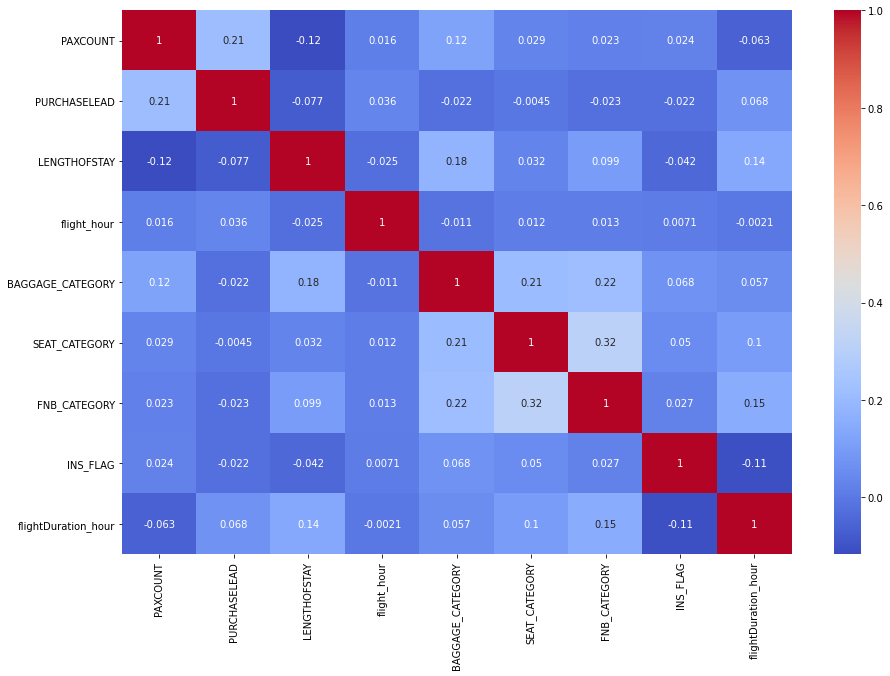

In [6]:
#check correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [7]:
#dealing with the route column
df["Start"] = df["ROUTE"].str.slice(0,3)
df["End"] = df["ROUTE"].str.slice(3,6)
df.head()

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour,Start,End
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,0,5.52,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52,AKL,DEL


In [8]:
df['Start'].value_counts()

DMK    3747
ICN    3732
MEL    3468
DPS    2902
AKL    2849
       ... 
CSX       4
NRT       2
CXR       1
URT       1
BTJ       1
Name: Start, Length: 85, dtype: int64

In [9]:
!pip install category_encoders 

     |████████████████████████████████| 81kB 7.9MB/s 


In [10]:
import category_encoders as ce
#Create target encoding object
encoder=ce.TargetEncoder(cols='Start') 
#Fit and Transform on Data depending upon the dependent variable
df['Start']=encoder.fit_transform(df['Start'],df['INS_FLAG'])
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour,Start,End
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52,0.200772,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52,0.200772,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52,0.200772,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,0,5.52,0.200772,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52,0.200772,DEL


In [11]:
#similar kind of encoding as done for 'Start' column 
encoder=ce.TargetEncoder(cols='End') 
#Fit and Transform on Data depending upon the dependent variable
df['End']=encoder.fit_transform(df['End'],df['INS_FLAG'])
df.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour,Start,End
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52,0.200772,0.096
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52,0.200772,0.096
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52,0.200772,0.096
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,0,5.52,0.200772,0.096
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52,0.200772,0.096


In [12]:
#target encoding of 'geoNetwork_country' column similar to earlier columns
encoder=ce.TargetEncoder(cols='geoNetwork_country') 
#Fit and Transform on Data depending upon the dependent variable
df['geoNetwork_country']=encoder.fit_transform(df['geoNetwork_country'],df['INS_FLAG'])
df.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour,Start,End
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,0.050279,1,0,0,0,5.52,0.200772,0.096
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,0.050279,0,0,0,0,5.52,0.200772,0.096
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,0.103150,1,1,0,0,5.52,0.200772,0.096
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,0.050279,0,0,1,0,5.52,0.200772,0.096
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,0.103150,1,0,1,0,5.52,0.200772,0.096


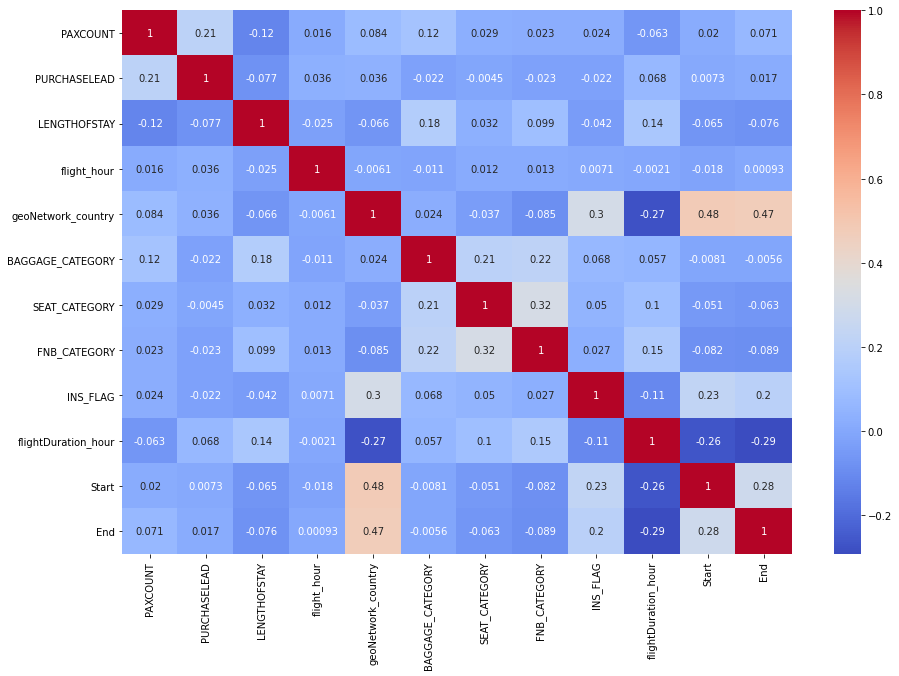

In [13]:
#check correlation after some changes 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


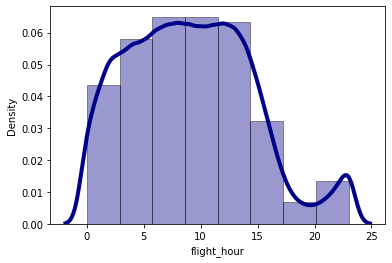

In [60]:
#distribution of flight hours
sns.distplot(df['flight_hour'], hist=True, kde=True, 
bins=int(8), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()


In [14]:
#binning of flight hours
bins1 = [-1,6,14,17,23]
labels1 = ['A','B','C','D']
temp_series1 = pd.cut(df['flight_hour'],bins=bins1,labels=labels1)
df['flight_hour_cat']=df['flight_hour'].apply(lambda x:temp_series1[x])
df.head(10)

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour,Start,End,flight_hour_cat
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,0.050279,1,0,0,0,5.52,0.200772,0.096,B
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,0.050279,0,0,0,0,5.52,0.200772,0.096,A
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,0.103150,1,1,0,0,5.52,0.200772,0.096,B
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,0.050279,0,0,1,0,5.52,0.200772,0.096,C
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,0.103150,1,0,1,0,5.52,0.200772,0.096,B
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,0.050279,1,0,1,0,5.52,0.200772,0.096,D
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,0.050279,1,0,1,0,5.52,0.200772,0.096,A
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,0.103150,1,0,1,0,5.52,0.200772,0.096,A
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,0.050279,0,0,1,0,5.52,0.200772,0.096,C
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,0.103150,0,0,0,0,5.52,0.200772,0.096,D


In [62]:
#one hot encoding for below columns
dummy_cols=['PAXCOUNT','SALESCHANNEL','flight_day','flight_hour_cat']
df=pd.get_dummies(data=df,columns=dummy_cols)
df.head()

In [16]:
#label encoding of triptypedesc
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TRIPTYPEDESC']=le.fit_transform(df['TRIPTYPEDESC'])
df.head()

,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour,Start,End,PAXCOUNT_1,PAXCOUNT_2,PAXCOUNT_3,PAXCOUNT_4,PAXCOUNT_5,PAXCOUNT_6,PAXCOUNT_7,PAXCOUNT_8,PAXCOUNT_9,SALESCHANNEL_Internet,SALESCHANNEL_Mobile,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,flight_hour_cat_A,flight_hour_cat_B,flight_hour_cat_C,flight_hour_cat_D
0,2,262,19,7,AKLDEL,0.050279,1,0,0,0,5.52,0.200772,0.096,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,2,112,20,3,AKLDEL,0.050279,0,0,0,0,5.52,0.200772,0.096,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,2,243,22,17,AKLDEL,0.103150,1,1,0,0,5.52,0.200772,0.096,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,2,96,31,4,AKLDEL,0.050279,0,0,1,0,5.52,0.200772,0.096,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,2,68,22,15,AKLDEL,0.103150,1,0,1,0,5.52,0.200772,0.096,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [17]:
#standarization of numerical columns for a better model
num_cols=['PURCHASELEAD','LENGTHOFSTAY','flightDuration_hour']
for i in num_cols:
    df[i]=(df[i]-np.mean(df[i]))/np.std(df[i])

In [18]:
#df_model is the final dataframe which we are going to use for model building
df_model=df.drop(['flight_hour','ROUTE'],axis=1)
X=df_model.drop(['INS_FLAG'],axis=1)
y=df_model['INS_FLAG']

In [19]:
#importing libraries for model valuation and algorithms
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from IPython.display import display
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 

In [20]:
# A function defined to evaluate the model 
def model_eval(test_tar,pred):  
    TN, FP, FN, TP = confusion_matrix(test_tar,pred).ravel()
    accuracy = metrics.accuracy_score(test_tar,pred)
    precision = metrics.precision_score(test_tar,pred)
    recall = metrics.recall_score(test_tar,pred)
    f_measure = (2*recall*precision)/(recall+precision)
    auc=roc_auc_score (test_tar,pred)
    specificity=(TN)/(TN+FP)
    FPR=1-specificity
    out = {}
    out['True Positive']=TP
    out['True Negative']=TN
    out['False Positive']=FP
    out['False Negative']=FN
    out['FPR']=FPR
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure 
    out['auc_score']=round(auc,2)
    return out

**Because of the class imbalance problem, we are going to use SMOTE+Tomek for oversampling and cleaning using Tomek Links**

In [63]:
from imblearn.combine import SMOTETomek
smtom= SMOTETomek(random_state=100)
X_smtom,y_smtom= smtom.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smtom, y_smtom, test_size=0.2, random_state=100)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

# RANDOM FOREST MODEL

### Creating the Random Forest Model before Hyperparameter Tuning

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Classifier Runtime: 1.7892398834228516s
Prediction Runtime: 0.08734893798828125s
FOR TEST SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,7414,7626,653,931,0.08,0.9,0.92,0.89,0.9,0.9


FOR TRAIN SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,29861,29881,9,95,0.0,1.0,1.0,1.0,1.0,1.0


No handles with labels found to put in legend.


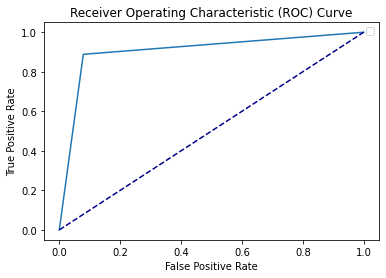

In [25]:
#Random Forests
import time
rf = RandomForestClassifier(n_estimators=20)
t0=time.time()
clf_gini = rf.fit(X_train,y_train)
t1=time.time()
clf_gini_pred_test = clf_gini.predict(X_test)
t2=time.time()
clf_gini_pred_train = clf_gini.predict(X_train)
d1,d2=[],[]
w1=model_eval(y_test,clf_gini_pred_test)
d1.append(w1)
w2=model_eval(y_train,clf_gini_pred_train)
d2.append(w2)
print('Classifier Runtime: '+ str(t1-t0)+'s')
print('Prediction Runtime: '+ str(t2-t1)+'s')
print("FOR TEST SET")
Class_Algo_dt1= round(pd.DataFrame(d1,index=['80-20 split']),2)
display(Class_Algo_dt1)
print("FOR TRAIN SET")
Class_Algo_dt2= round(pd.DataFrame(d2,index=['80-20 split']),2)
display(Class_Algo_dt2)
#plotting roc curves
fpr, tpr, thresholds = roc_curve(y_test, clf_gini_pred_test)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Since accuracy of training set is 1.0, it implies that my model is overfitting the training data**

## Hyperparameter Tuning Using RandomSearchCV

In [22]:
# Number of trees in random forest
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Instantiating Decision Tree classifier 
tree = RandomForestClassifier() 
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(estimator=tree,n_iter=10,param_distributions=random_grid, cv =10,scoring='roc_auc',n_jobs=-1,verbose=2) 
tree_cv.fit(X_dev,y_dev) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


Tuned Decision Tree Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 44, 'bootstrap': False}
Best score is 0.9319337039585577


### Creating the Random Forest Model after Hyperparameter Tuning

Classifier Runtime: 7.083744525909424s
Prediction Runtime: 0.06704354286193848s
FOR TEST SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,7213,7639,640,1132,0.08,0.89,0.92,0.86,0.89,0.89


FOR TRAIN SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,28465,29514,376,1491,0.01,0.97,0.99,0.95,0.97,0.97


No handles with labels found to put in legend.


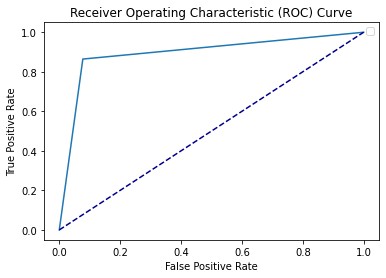

In [28]:
# # split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_smtom, y_smtom, test_size=0.2, random_state=100)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
#Random Forests
import time
rf = RandomForestClassifier(n_estimators=20,min_samples_split=10,min_samples_leaf=1,max_features=None,max_depth=30,bootstrap=True)
t0=time.time()
clf_gini = rf.fit(X_train,y_train)
t1=time.time()
clf_gini_pred_test = clf_gini.predict(X_test)
t2=time.time()
clf_gini_pred_train = clf_gini.predict(X_train)
d1,d2=[],[]
w1=model_eval(y_test,clf_gini_pred_test)
d1.append(w1)
w2=model_eval(y_train,clf_gini_pred_train)
d2.append(w2)
print('Classifier Runtime: '+ str(t1-t0)+'s')
print('Prediction Runtime: '+ str(t2-t1)+'s')
print("FOR TEST SET")
Class_Algo_dt1= round(pd.DataFrame(d1,index=['80-20 split']),2)
display(Class_Algo_dt1)
print("FOR TRAIN SET")
Class_Algo_dt2= round(pd.DataFrame(d2,index=['80-20 split']),2)
display(Class_Algo_dt2)
#plotting roc curves
fpr, tpr, thresholds = roc_curve(y_test, clf_gini_pred_test)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Now this model seems to be fine since training accuracy isn't 1.0 and hence model doesn't overfit**

#XGBOOST MODEL

## Model Building before hyperparameter tuning


Model Report
FOR TEST SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,7162,7473,806,1183,0.1,0.88,0.9,0.86,0.88,0.88


FOR TRAIN SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,28448,30316,2965,4767,0.09,0.88,0.91,0.86,0.88,0.88


No handles with labels found to put in legend.


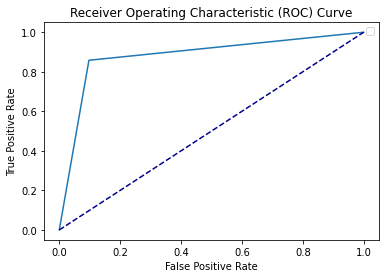

In [29]:
# #splitting into training and test sets 
train_features, test_features, train_tar, test_tar = train_test_split(X_smtom,y_smtom, test_size = 0.2, random_state = 100)
xgb1 = XGBClassifier(n_estimators=200, objective='binary:logistic')
#Fit the algorithm on the data
xgb1.fit(train_features,train_tar,eval_metric='auc')
#Predict training set:
dtrain_predictions = xgb1.predict(train_features)
#Predict test set:
dtest_predictions = xgb1.predict(test_features)
#Print model report:
print ("\nModel Report")
a1,a2=[],[] 
#evaluations on test set
w1=model_eval(test_tar, dtest_predictions)
a1.append(w1)
#evaluations on train set
w2=model_eval(train_tar,dtrain_predictions)
a2.append(w2)
#print(w)
print("FOR TEST SET")
Class_Algo1= round(pd.DataFrame(a1,index=['80-20 split']),2)
display(Class_Algo1)
print("FOR TRAIN SET")
Class_Algo2= round(pd.DataFrame(a2,index=['80-20 split']),2)
display(Class_Algo2)
fpr, tpr, thresholds = roc_curve(test_tar, dtest_predictions)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show() 

## Hyperparameter Tuning Using RandomSearch CV

In [24]:
#hyperparameter tuning
from scipy.stats import uniform  
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {
        'min_child_weight': uniform(1,2),
        'gamma': [i/10 for i in range(1,5)],
        'subsample': uniform(0.1,1),
        'colsample_bytree': uniform(0.5,1),
        'max_depth': [3, 4, 5,7,9,11],
        'learning_rate': [i/10 for i in range(1,5)]
        }
# Instantiating xgboost classifier 
xgb1 = XGBClassifier(n_estimators=200, objective='binary:logistic',nthread=1)
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(xgb1, param_distributions=param_dist, n_iter=25, scoring='roc_auc', n_jobs=-1, cv=4, verbose=3, random_state=100) 
tree_cv.fit(test_features,test_tar) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


Tuned Decision Tree Parameters: {'colsample_bytree': 0.7465358812035496, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1.113725423172304, 'subsample': 0.9867245659081166}
Best score is 0.9551890233770512


## Model Building after hyperparameter tuning


Model Report
FOR TEST SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,7082,7764,515,1263,0.06,0.89,0.93,0.85,0.89,0.89


FOR TRAIN SET


,True Positive,True Negative,False Positive,False Negative,FPR,accuracy,precision,recall,f_measure,auc_score
80-20 split,28358,31476,1805,4857,0.05,0.9,0.94,0.85,0.89,0.9


No handles with labels found to put in legend.


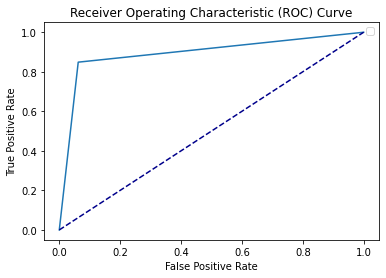

In [30]:
# #splitting into training and test sets 
train_features, test_features, train_tar, test_tar = train_test_split(X_smtom,y_smtom, test_size = 0.2, random_state = 100)
xgb1 = XGBClassifier(n_estimators=200, objective='binary:logistic',nthread=1,colsample_bytree=0.7465358812035496,gamma=0.2,learning_rate=0.2,max_depth=3,
                     min_child_weight=1.113725423172304,subsample=0.9867245659081166)
#Fit the algorithm on the data
xgb1.fit(train_features,train_tar,eval_metric='auc')
#Predict training set:
dtrain_predictions = xgb1.predict(train_features)
#Predict test set:
dtest_predictions = xgb1.predict(test_features)
#Print model report:
print ("\nModel Report")
a1,a2=[],[] 
#evaluations on test set
w1=model_eval(test_tar, dtest_predictions)
a1.append(w1)
#evaluations on train set
w2=model_eval(train_tar,dtrain_predictions)
a2.append(w2)
#print(w)
print("FOR TEST SET")
Class_Algo1= round(pd.DataFrame(a1,index=['80-20 split']),2)
display(Class_Algo1)
print("FOR TRAIN SET")
Class_Algo2= round(pd.DataFrame(a2,index=['80-20 split']),2)
display(Class_Algo2)
fpr, tpr, thresholds = roc_curve(test_tar, dtest_predictions)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show() 

**So after hyperparmeter tuning the performance of model has obviously improved a bit**

# Part 2 

## Using our model and expected value to decide which customers to try and upsell

In [32]:
X_train,X_test = train_test_split(X,test_size=0.2, random_state=100)
X_test.head()

,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,flightDuration_hour,Start,End,PAXCOUNT_1,PAXCOUNT_2,PAXCOUNT_3,PAXCOUNT_4,PAXCOUNT_5,PAXCOUNT_6,PAXCOUNT_7,PAXCOUNT_8,PAXCOUNT_9,SALESCHANNEL_Internet,SALESCHANNEL_Mobile,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,flight_hour_cat_A,flight_hour_cat_B,flight_hour_cat_C,flight_hour_cat_D
4253,2,-0.552131,0.087214,0.259603,1,1,1,-0.633037,0.231723,0.172447,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
30076,2,-0.740079,-0.561996,0.107848,0,0,0,-1.742035,0.231723,0.172354,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
48047,2,3.040996,-0.502977,0.344020,1,1,0,1.037139,0.244335,0.094509,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1666,2,-0.419461,0.470838,0.050279,1,0,1,1.037139,0.200772,0.212054,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
30740,2,-0.695856,-0.561996,0.231527,1,0,0,-0.185430,0.115025,0.218750,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


 **Now consider that X_test is the test dataset whose labels aren't known by the organisation. Though in this case we know, but that can be considered as a hypothetical situation.** 

**In the below line of code I have calculated the probability of every person in the test dataset to be taking the health insurance using our Random Forest Model**

In [34]:
p_u = [x[1] for x in clf_gini.predict_proba(X_test)]
p_u[:10]

[0.49277181152181154,
 0.1481733544233544,
 0.13851398601398598,
 0.037803030303030304,
 0.1882094221567906,
 0.035897435897435895,
 0.29965201465201463,
 0.07833333333333334,
 0.2251190476190476,
 0.03166666666666666]

**Consider that the profit attained when the customer buys the airline insurance is Rs 10000 and the cost of upselling/insurance is Rs 3500**

In [46]:
## Fully inclusive profit
expected_profit_of_upsell = np.multiply(p_u, (10000-3500)) + np.multiply(np.subtract(1, p_u), -3500) # using numpy functions for multiplying a vector element-wise by a scalar
expected_profit_of_upsell = pd.Series(expected_profit_of_upsell, index=X_test.index) # turn into a pandas Series with customer numbers
expected_profit_of_upsell.head()

4253     1427.718115
30076   -2018.266456
48047   -2114.860140
1666    -3121.969697
30740   -1617.905778
dtype: float64

In [47]:
expected_profit_of_upsell.sort_values(inplace=True, ascending=False) # sort expected profit descending
cumulative_profit_of_upsell = expected_profit_of_upsell.cumsum() # calculate cumulative total profit
cumulative_profit_of_upsell_df = pd.DataFrame({
        'Expected Total Profit': cumulative_profit_of_upsell, 
        'Upsell Top x%': pd.Series(
            [float(i+1) / len(cumulative_profit_of_upsell) * 100 for i in range(len(cumulative_profit_of_upsell))], 
            index=cumulative_profit_of_upsell.index)
    }) # calculate "top x%", for plotting

In [48]:
max_profit = cumulative_profit_of_upsell_df.iloc[cumulative_profit_of_upsell_df['Expected Total Profit'].argmax()]
max_profit

Expected Total Profit    4.347111e+06
Upsell Top x%            1.912000e+01
Name: 16791, dtype: float64

In [49]:
print((max_profit['Upsell Top x%']/100. * len(cumulative_profit_of_upsell_df)))
print(len(cumulative_profit_of_upsell_df))

1912.0
10000


**The above result implies that the airline gets the maximum profits when it sells insurances to the top 1912 or 19.12% of customers and this value is Rs Rs 4347110.86**

Text(0, 0.5, 'Expected Total Profit (Rs)')

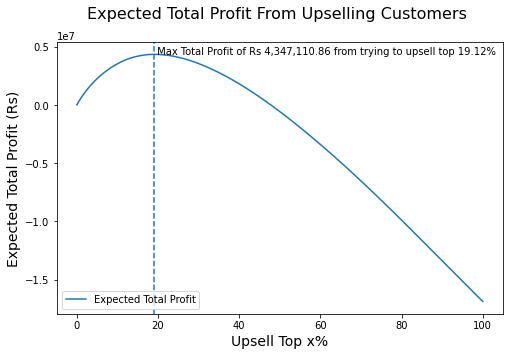

In [58]:
axes = cumulative_profit_of_upsell_df.plot(x='Upsell Top x%', y='Expected Total Profit', figsize=(8,5))

axes.text(max_profit['Upsell Top x%'], max_profit['Expected Total Profit']+10000, 
          " Max Total Profit of %s from trying to upsell top %s%%" % 
          ('Rs {:,.2f}'.format(max_profit['Expected Total Profit']), max_profit['Upsell Top x%'])
         )
plt.axvline(x=max_profit['Upsell Top x%'], linestyle='--')
plt.legend(loc=3)
plt.title("Expected Total Profit From Upselling Customers \n", fontsize=16)
plt.xlabel("Upsell Top x%", fontsize=14)
plt.ylabel("Expected Total Profit (Rs)", fontsize=14)